#  **EDA**

In [60]:
#LIBRERIAS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils as eda
import os

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [61]:
#ARCHIVO + TARGET
URL = '../data/processed/ds_early.csv'
ds_early = pd.read_csv(URL)
target = 'Outcome'

___

## **ANALISIS MULTIVARIABLE**

Ya que no hay variables categoricas, no hay necesidad de hacer un analisís categoríca-categoríca así que, paso a hacer un analisís númerico-númerico.

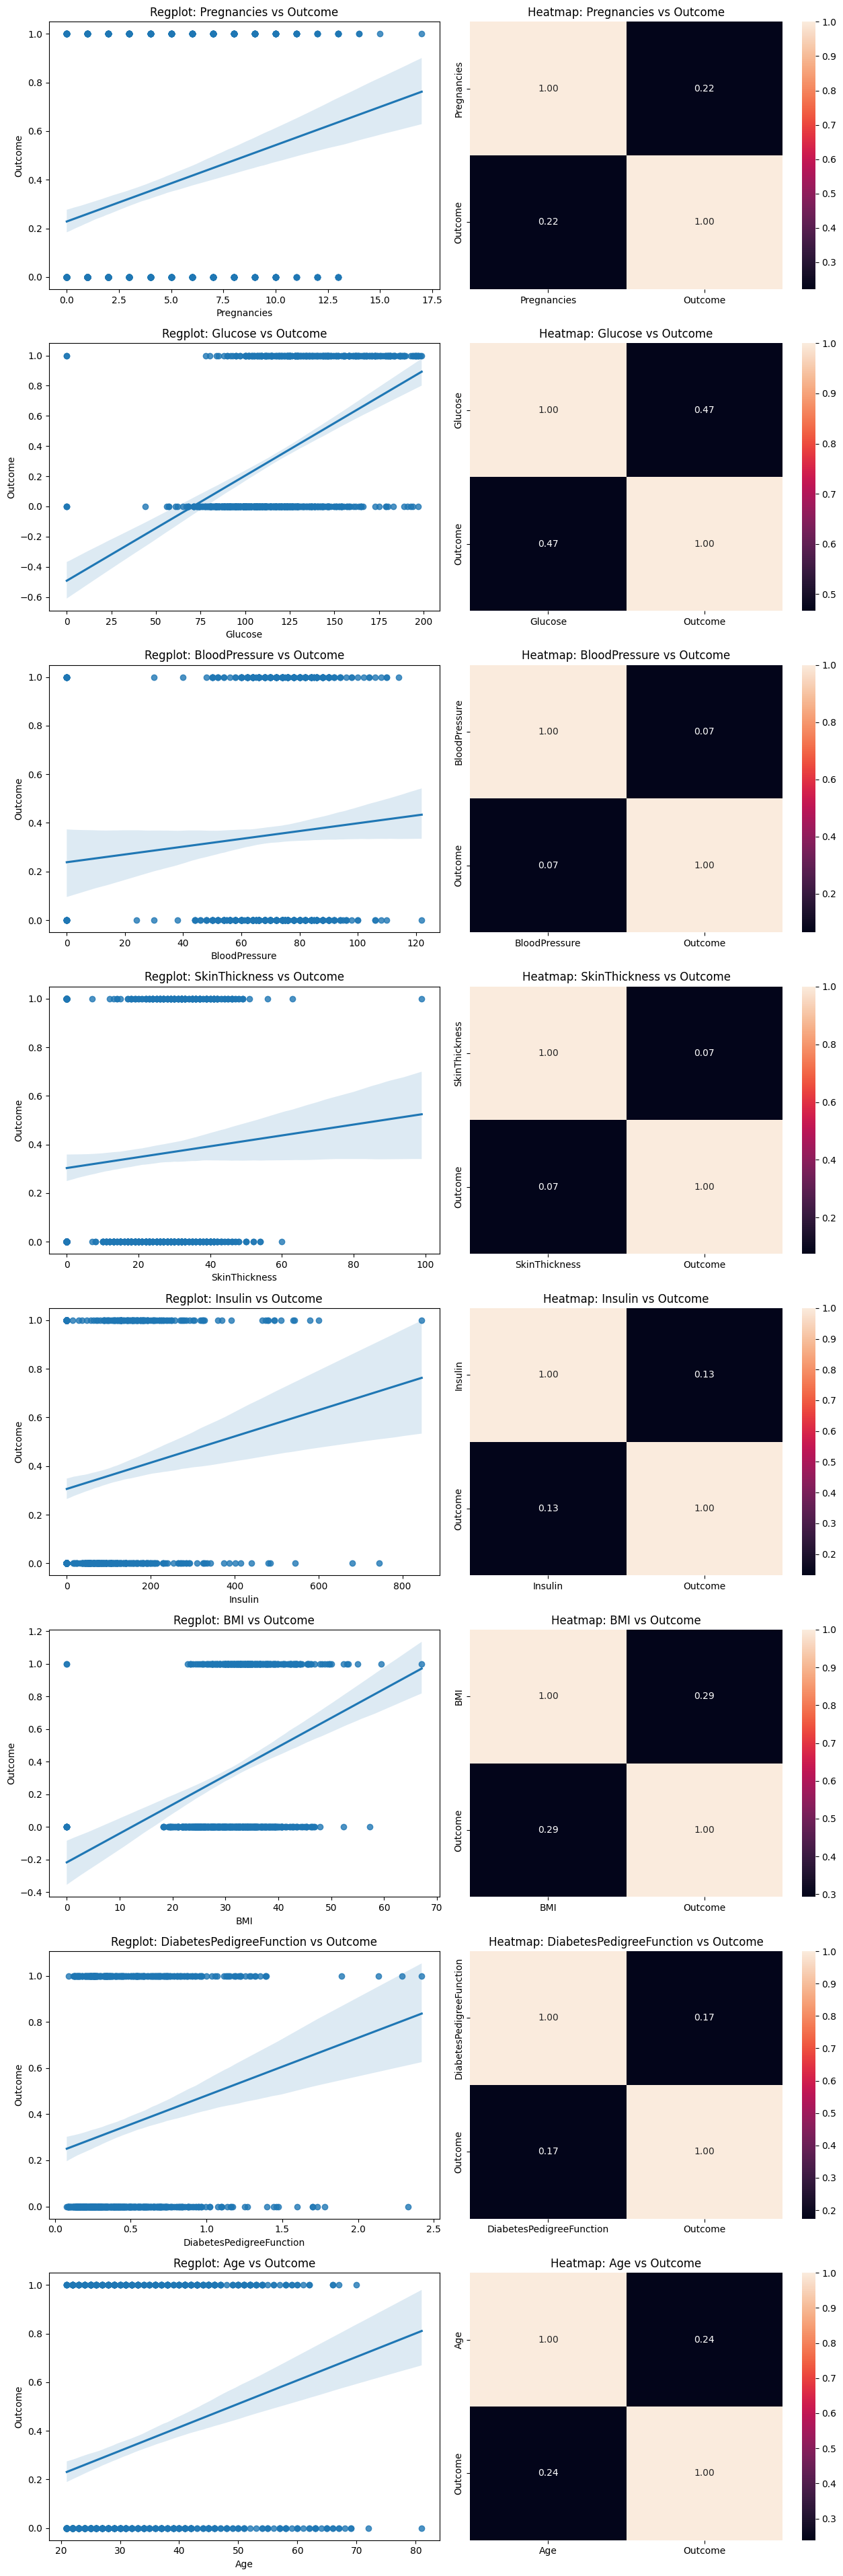

In [62]:
eda.plot_scatter_heatmaps(ds_early, target)

Según el analisis de mapa de puntos vs la correlación determiné lo siguiente:

**Pregnancies:** Hay una funcion creciente según a la correlación, es decir entre mas embarazos hay mas prepencidad a una diabetes (Existe una buena Correlación).

**Glucose:** Evidentemente es una variable que se correlaciona con el objetivo.

**BloodPressure:** Es una variable que no tiene mucha dependencia o que no es muy determinante, al igual que "**SkinThickness**".

**Insulin:** Aparenta no tener mucha correlacion pero, considero que es una variable con datos valiosos sobre la diabetes.

**BMI:** Con buena correlación.

**DiabetesPedigreeFunction:** No revela una correlación muy fuerte, pero tomaria esta variable.

**Age:** Con buena Correlación.


___

## **MATRIZ DE CORRELACION**

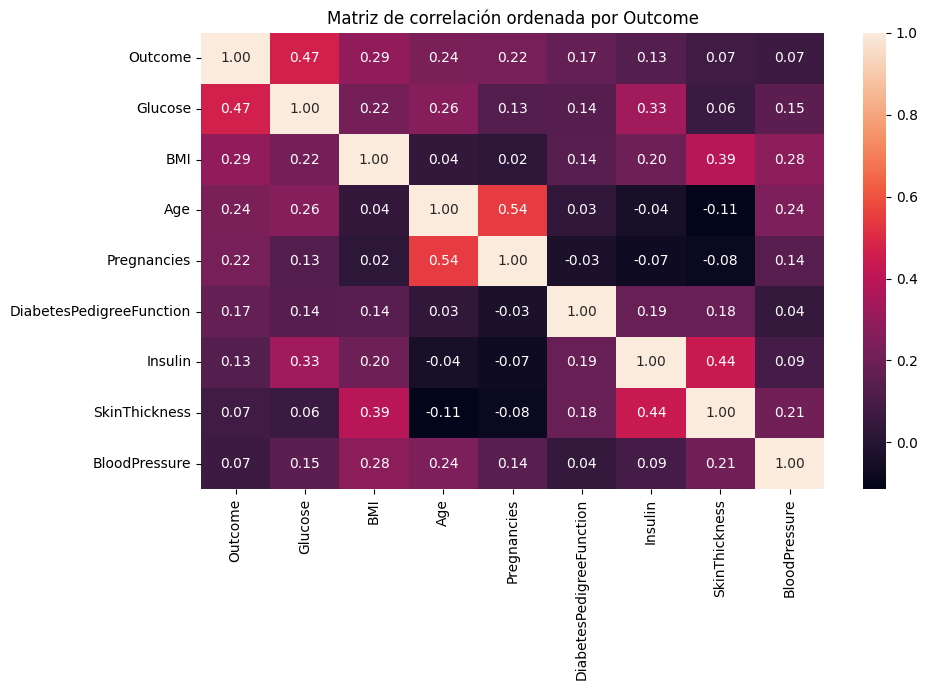

In [63]:
eda.general_heatmap_sorted(ds_early, target)
#La matriz de correlacion esta en orden ascendete con respecto a la target

___

### **ANALISIS DE OUTLIERS**

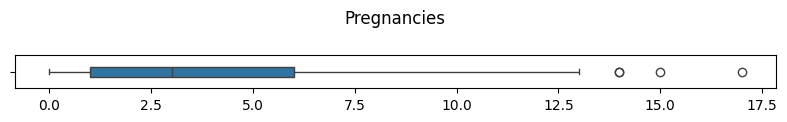

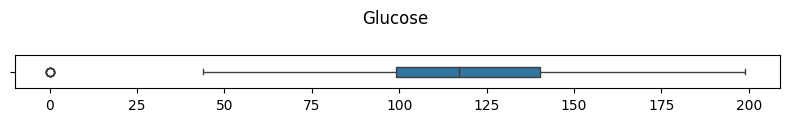

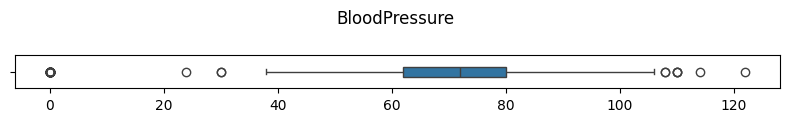

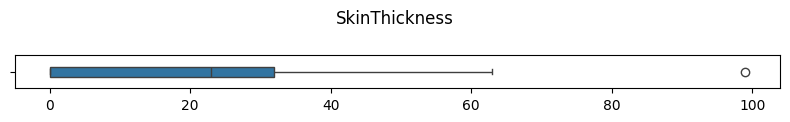

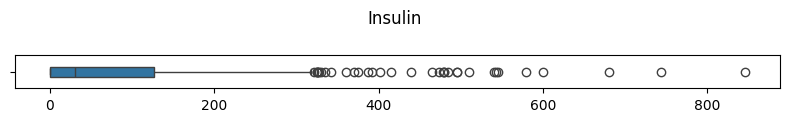

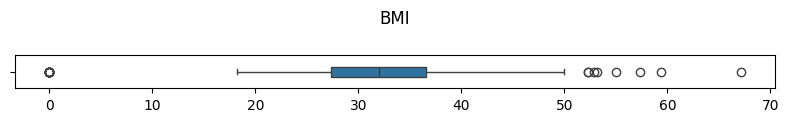

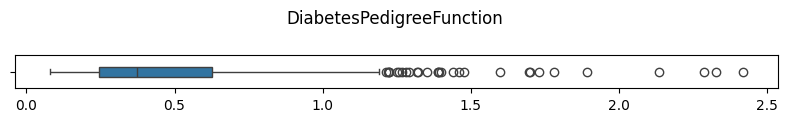

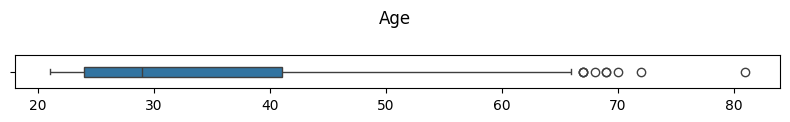

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [64]:
eda.outlier_analysis(ds_early,target)

`Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` y `BMI` tienen 0

In [65]:
outliers = ds_early[
    (ds_early['Glucose'] == 0) |
    (ds_early['BloodPressure'] == 0) |
    (ds_early['SkinThickness'] == 0) |
    (ds_early['Insulin'] == 0)|
    (ds_early['BMI'] == 0)
]
eda.outliers_summary (ds_early, outliers)

the rows with outliers are 376
the total rows are 768
this represents 49.0 % of the dataset


In [66]:
#Reviso cuantos ceros hay
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in zero_cols:
    ds_early[col] = ds_early[col].replace(0, np.nan).copy()

ds_early[zero_cols].isna().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

___

## **Train/Test Split**

Antes de pasar a modificar el Df haré el split, ¿Por qué?

filtro info del test hacia el train → métrica inflada y poco realista.

Si hago el split PRIMERO y luego imputo usando solo el train → evitas leakage y tienes una evaluación honesta.



In [67]:
X = ds_early.drop(columns=[target])
y = ds_early[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

**Guardo el DS antes de la seleccion de caracteristicas**

In [68]:
output_path = "../data/Datasets"   # ajusta si tu ruta es otra

early_dataset_train = pd.concat([X_train, y_train], axis=1)
early_dataset_test  = pd.concat([X_test, y_test], axis=1)

early_dataset_train.to_csv(os.path.join(output_path, "early_dataset_train.csv"), index=False)
early_dataset_test.to_csv(os.path.join(output_path, "early_dataset_test.csv"), index=False)

Aqui creo una carpeta en donde divido los dataframes

____

Realizo un capping de outliers(X_train y X_test)

In [69]:
URL_2 = '../data/processed/ds_early.csv'
ds_clean = pd.read_csv(URL_2)

In [70]:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in zero_cols:
    ds_clean[col] = ds_clean[col].replace(0, np.nan).copy()

In [71]:
df_mean = ds_clean.mean()
clean_total_data = ds_clean.copy()
clean_total_data = clean_total_data.fillna(df_mean)

print("DATASET WITH 0 VALUES REPLACED BY MEAN", clean_total_data.shape)
clean_total_data[zero_cols].describe().T

DATASET WITH 0 VALUES REPLACED BY MEAN (768, 9)


,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,121.686763,30.435949,44.0,99.75,117.000000,140.250000,199.0
BloodPressure,768.0,72.405184,12.096346,24.0,64.00,72.202592,80.000000,122.0
SkinThickness,768.0,29.153420,8.790942,7.0,25.00,29.153420,32.000000,99.0
Insulin,768.0,155.548223,85.021108,14.0,121.50,155.548223,155.548223,846.0
BMI,768.0,32.457464,6.875151,18.2,27.50,32.400000,36.600000,67.1


In [72]:
num_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness',
            'Insulin','BMI','DiabetesPedigreeFunction','Age']

def cap_outliers_train_test(X_train, X_test, cols, lower_q=0.01, upper_q=0.99):
    X_train = X_train.copy()
    X_test = X_test.copy()
    for c in cols:
        low = X_train[c].quantile(lower_q)
        high = X_train[c].quantile(upper_q)
        X_train[c] = X_train[c].clip(low, high)
        X_test[c] = X_test[c].clip(low, high)
    return X_train, X_test

X_train_cap, X_test_cap = cap_outliers_train_test(X_train, X_test, num_cols)

Ahora imputo.

In [73]:
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train_cap)  # aprende SOLO del train

X_train_clean = pd.DataFrame(
    imputer.transform(X_train_cap),
    columns=X_train_cap.columns,
    index=X_train_cap.index
)

X_test_clean = pd.DataFrame(
    imputer.transform(X_test_cap),
    columns=X_test_cap.columns,
    index=X_test_cap.index
)


In [74]:
clean_total_data[zero_cols].isna().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

**Guardo el X_train y X_test limpio**

In [75]:
clean_dataset_train = pd.concat([X_train_clean, y_train], axis=1)
clean_dataset_test  = pd.concat([X_test_clean, y_test], axis=1)

clean_dataset_train.to_csv(os.path.join(output_path, "clean_dataset_train.csv"), index=False)
clean_dataset_test.to_csv(os.path.join(output_path, "clean_dataset_test.csv"), index=False)

**Guardo el Df limpio**

In [76]:
clean_total_data.to_csv('../data/processed/ds_clean.csv', index=False)

___

## **SELECCION DE CARACTERISTICAS**

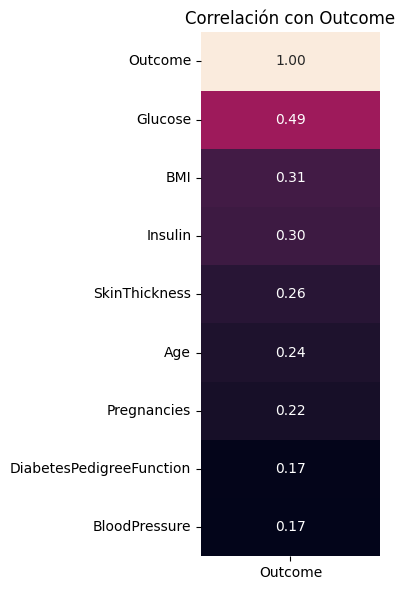

In [77]:
eda.heatmap_target_only(ds_clean,target)

Hago la correlacion para seleccionar las variables que mas se correlacionan para tenerlas en el modelado, en este caso son **Pregnancies**, **Glucose**, **Age**, **BMI** y **SkinThinckness**.

In [78]:
selected_cols = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness']


X_train_sel = X_train_clean[selected_cols]
X_test_sel  = X_test_clean[selected_cols]

sel_dataset_train = pd.concat([X_train_sel, y_train], axis=1)
sel_dataset_test  = pd.concat([X_test_sel, y_test], axis=1)

sel_dataset_train.to_csv(os.path.join(output_path, "sel_dataset_train.csv"), index=False)
sel_dataset_test.to_csv(os.path.join(output_path, "sel_dataset_test.csv"), index=False)